---
layout:     post
title:      Birthday paradox
subtitle:   Are here any people with the same birthday?
date:       2021-06-07
author:     Martin Beneš
header-img: bday_paradox_data/bday.jpg
catalog:    true
katex:      true
tags:
    - probability
    - mathematics
    - combinatorics
    - logic
---

There is 23 people in the group. What if I tell you that the probability that (at least) two of them have birthday at the same day is more than 0.5? You don't believe? Ok, let's sort it out!

## Number of combinations

When comparing peoples' birthdays, we care about number of all possible combinations of 2, order does not matter to us. This is denoted as

$${N\choose 2} = \frac{N(N-1)}{2}$$

For 23 people it means 253 possible couplings. This group will do 253 one-to-one glass clinks during a toast.

## For 2 people

Let's move to the probability. The probability of two people having birthday on different days is

$$\frac{364}{365} \approx 0.9973$$

Each person has a known birthday date and leap years are not assumed. The complement for this is the probability of two people having birthday on the same day.

$$\frac{1}{365} \approx 0.0027$$

## For 3 people

The result in the [previous section](#For-2-people) can be applied to a group of three people. For such group, we can create 3 different pairs to compare (see [Number of combinations](#Number-of-combinations)).

$${3\choose 2} = 3$$

We want all three people (A, B, C) to have their birthdays (bA, bB, bC) in different days. We query each pair of people in the group and all must be different.

$$(bA \neq bB)~\text{and}~(bA \neq bC)~\text{and}~(bC \neq bB)$$

We assume no dependence between the people (e.g. twins present); then probabilities simply multiply

$$P(bA\neq bB)~P(bA\neq bC)~P(bB\neq bC)$$

Each term is equivalent to the situation of group of two people from the [previous section](#For-2-people). We can replace the event for each specific couple by a general birthday match and write in an exponent.

$$\Big[P(\text{B-days of 2 people on different days})\Big]^3$$

Under our previous assumptions this is

$$\Big[\frac{364}{365}\Big]^3$$

Probability of all people in a group of 3 having birthday on different days is 0.9918.

## For 4 people

Before generalization onto n people, let's extend the example for 4 people. In a group of 4 (A, B, C, D) we can create 6 pairs (A-B, A-C, A-D, B-C, B-D, C-D).

$$\Big[\frac{364}{365}\Big]^6$$

The probability of all 4 people having a birthday on different days is 0.9837.

## For N people

Let's transform our previous computation for a general group of N people. In the last expression, we replace the exponent with number of combinations for N

$$P(\text{N peoples' birthdays in different days}) = \Big[\frac{364}{365}\Big]^{N\choose 2}$$

The complementary probability can be implemented using this formula.

In [1]:
# probability distribution for Birthday paradox

bday_paradox = lambda n: 1 - (364/365)**(n*(n-1)/2)

For different N between 1 and 80 we receive unintuitive results for the probabilities.

In [2]:
# N in {1,...,80}

import numpy as np
N = np.linspace(1,80,80) 
Pn = bday_paradox(N)

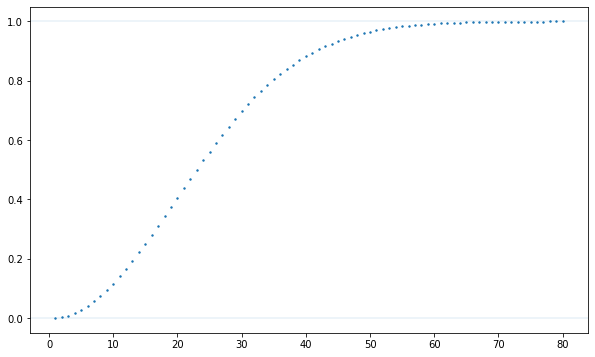

In [3]:
# plot

import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(N, Pn, s=2)
ax.axhline(1, alpha=.1);
ax.axhline(0, alpha=.1);

In group of 23 people the probability of somebody having a birthday on the same date is greater than 0.5.

In [4]:
Pn[22] # indexing from 0

0.5004771540365807

To get probability 0.9 we need a group of 41 people.

In [5]:
np.argmin(Pn < 0.9)

41

## Summary

In this article, we described a phonemonon called *Bithday paradox*, which describes surprisingly high probability of two people having birthday on the same day. The probability distribution for the group size is visualized.

In a group of 23 people the probability is more than 0.5.

## References

- Better Explained: Understanding the Birthday Paradox. <a href="https://betterexplained.com/articles/understanding-the-birthday-paradox/">https://betterexplained.com/</a>.
- Marek Valášek: Jak nás klame intuice 1. <a href="https://www.youtube.com/watch?v=cuBbmeLwZGg">https://www.youtube.com/</a>
- Andrea Giancoli: Have a Fun and Healthful Birthday Party. <a href="https://www.eatright.org/health/lifestyle/holidays/have-a-fun-and-healthier-birthday-party">https://www.eatright.org/</a>